# lab alameda county jury selection  problem

In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = {'Ethnicity':['Asian', 'Black', 'Latino', 'White','Other'],
        'Eligible':[0.15, 0.18, 0.12, 0.54, 0.01],
        'Panels':[0.26, 0.08, 0.08, 0.54, 0.04]} 

In [3]:
df=pd.DataFrame(dt)

In [6]:
jury = pd.DataFrame(df)
jury

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


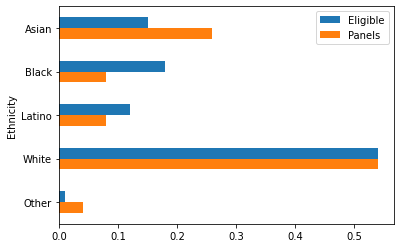

In [7]:
df.plot.barh('Ethnicity').invert_yaxis()

In [9]:
df['Difference']= df.Panels - df.Eligible
df

,Ethnicity,Eligible,Panels,Difference
0,Asian,0.15,0.26,0.11
1,Black,0.18,0.08,-0.10
2,Latino,0.12,0.08,-0.04
3,White,0.54,0.54,0.00
4,Other,0.01,0.04,0.03


In [10]:
df['Difference']= abs(df.Panels - df.Eligible)
df

,Ethnicity,Eligible,Panels,Difference
0,Asian,0.15,0.26,0.11
1,Black,0.18,0.08,0.10
2,Latino,0.12,0.08,0.04
3,White,0.54,0.54,0.00
4,Other,0.01,0.04,0.03


In [12]:
average_diff=df['Difference'].sum()/2
average_diff


0.14

In [21]:
def tvd(diff1, diff2):
    return np.abs(diff1 - diff2).sum()/2

def table(table, label, other):
    return tvd(table[label], table[other])

table(jury, 'Eligible', 'Panels')

0.14

In [14]:
PS=1453      #random multinomial distribution n value

In [15]:
jury["Random Sample"] = np.random.multinomial(PS, jury["Eligible"])/PS
jury

,Ethnicity,Eligible,Panels,Difference,Random Sample
0,Asian,0.15,0.26,0.11,0.132829
1,Black,0.18,0.08,0.10,0.180317
2,Latino,0.12,0.08,0.04,0.106676
3,White,0.54,0.54,0.00,0.567103
4,Other,0.01,0.04,0.03,0.013076


In [16]:
df.drop('Difference',axis=1,inplace=True)

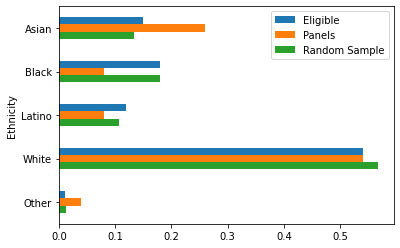

In [17]:
df.plot.barh('Ethnicity').invert_yaxis()

In [18]:
df

,Ethnicity,Eligible,Panels,Random Sample
0,Asian,0.15,0.26,0.132829
1,Black,0.18,0.08,0.180317
2,Latino,0.12,0.08,0.106676
3,White,0.54,0.54,0.567103
4,Other,0.01,0.04,0.013076


In [20]:
table(jury, 'Eligible', 'Random Sample')

0.03049552649690294

In [24]:
tds = []

for i in range(5000):
    
    jury["Random Sample"] = np.random.multinomial(PS, jury["Eligible"])/PS
    tds.append(table(jury, 'Eligible', 'Random Sample'))

result=pd.Series(tds,name="TDS")
result.head()

0    0.012175
1    0.005403
2    0.019883
3    0.015175
4    0.012498
Name: TDS, dtype: float64

<AxesSubplot:>

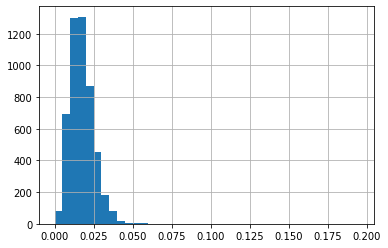

In [25]:
result.hist(bins=np.arange(0, 0.2, 0.005))